In [4]:
import pandas as pd

df = pd.read_csv('~/PycharmProjects/Financial_Programming/Homework/HW2/TAQ_JNJ_1004_1015_2010_trading_.csv', delim_whitespace=True)

df.dtypes

date        int64
hour        int64
minute      int64
second      int64
price     float64
volume      int64
dtype: object

In [5]:
df1 = df.loc[(df.hour >= 10) & (df.hour < 16)]
df2 = df.loc[(df.hour == 9) & (df.minute >= 30)]

data = pd.concat([df1, df2], axis=0)

data.reset_index(drop=True, inplace=True)

data.to_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv')

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

data.loc[:,'date'] = pd.to_datetime(data.loc[:, 'date'].astype(str))

data.dtypes

date      datetime64[ns]
hour               int64
minute             int64
second             int64
price            float64
volume             int64
dtype: object

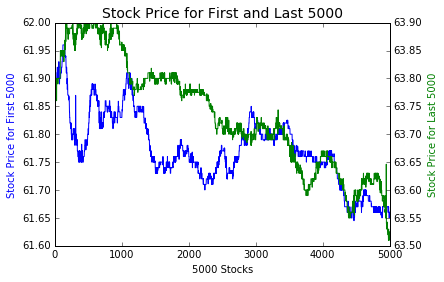

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(range(5000), data.iloc[:5000, 4], 'b-')
ax2.plot(range(5000), data.iloc[-5000:, 4], 'g-')

plt.title('Stock Price for First and Last 5000', fontsize=14)

ax1.set_xlabel('5000 Stocks')
ax1.set_ylabel('Stock Price for First 5000', color='b')
ax2.set_ylabel('Stock Price for Last 5000', color='g')

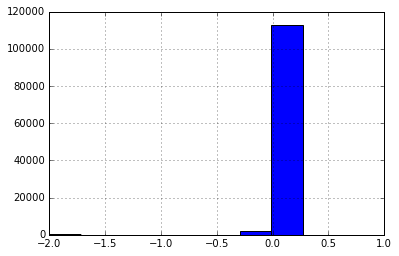

In [8]:
data.loc[:,'price_1'] = data.price.shift(1)

data_y = data.loc[data.price != data.price_1].dropna()
data_y.loc[:, 'price_change'] = data.loc[:,'price'] - data.loc[:,'price_1']


data_y.loc[:, 'price_change'].hist()

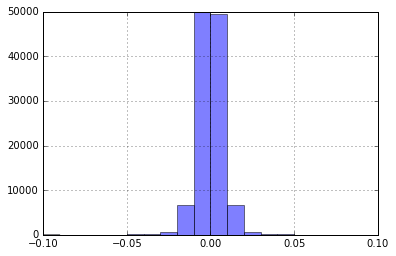

In [9]:
data_y.loc[(data_y.price_change > -0.1) & (data_y.price_change < 0.1), 'price_change'].hist(color='b', alpha=0.5, bins=20)

In [10]:
freq = pd.DataFrame(data_y.price_change.value_counts())

freq.describe()

,price_change
count,974.000000
mean,117.845996
std,791.135007
min,1.000000
25%,1.000000
50%,3.000000
75%,35.750000
max,13204.000000


In [11]:
data.head()

,date,hour,minute,second,price,volume,price_1
0,2010-10-04,10,0,0,61.86,100,NaN
1,2010-10-04,10,0,0,61.85,100,61.86
2,2010-10-04,10,0,0,61.85,100,61.85
3,2010-10-04,10,0,1,61.86,100,61.85
4,2010-10-04,10,0,1,61.86,500,61.86


all files are saved. Below is the last one showing here for example.


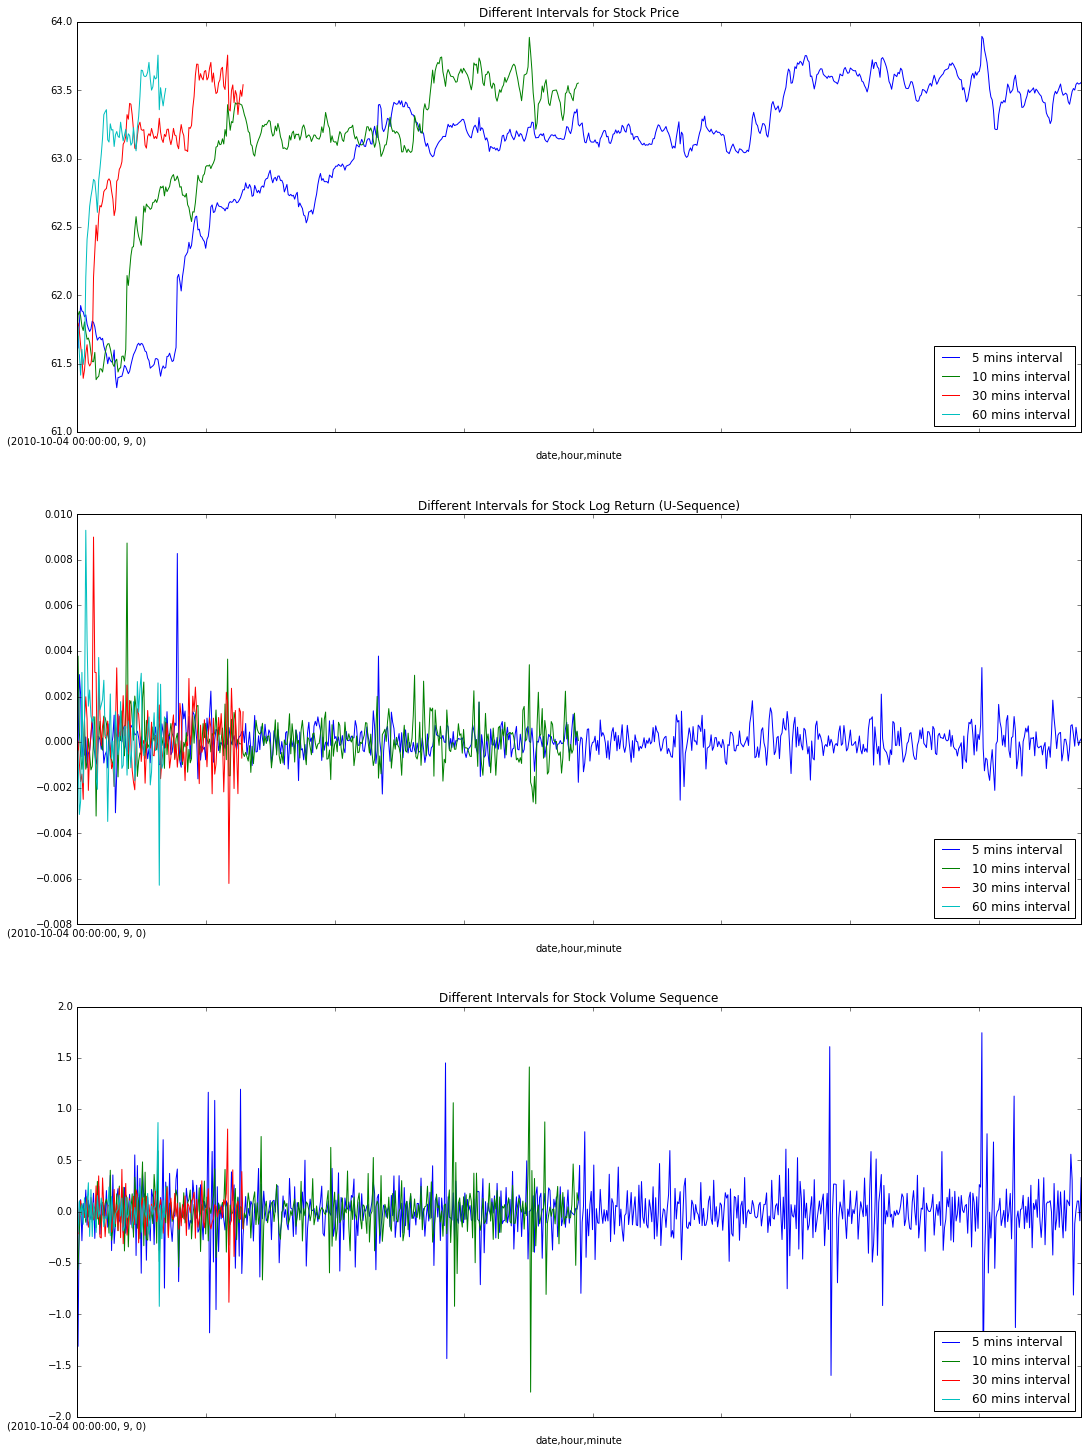

In [12]:
def partition(df, interval = 5, unit = 'minute'):
    import pandas as pd
    import numpy as np
    '''
    This function will partition the trading time sequence into 5/10/30/60-minute intervals by picking the mean transaction price 
    and volumes in each interval and compute the U sequence as well as the volume sequence. Then it will calculate section volatility
    and volume section standard deviation
    
    parameters:
    
    df - original high frequency trading data
    interval - 5 mins, 10mins, 30mins or 60mins
    unit - second, minute (default), hour
    
    :return: new trading data after partitioning and save it to a new csv file
    '''
    
    df_new = pd.DataFrame()
    
    column = ['date', 'hour', 'minute', 'second', 'price', 'volume']

    
    if unit == 'second':
        r = 60
        window = 24 * 60 * 60 // interval
    elif unit == 'minute':
        column.remove('second')
        r = 60
        window = 24 * 60 // interval
    else:
        column.remove('second')
        column.remove('minute')
        r = 24
        window = 24 // interval
        
    df_new = df.loc[:, column]
    
    last_intvl = 0
    for intvl in range(0, r+1, interval):
        df_new.loc[(df_new.loc[:, unit] > last_intvl) & (df_new.loc[:, unit] < intvl), unit] = last_intvl
        last_intvl = intvl
    
    groupby = column[:-2]
    df_new = df_new.groupby(groupby).mean()
    
    df_new.loc[:, 'u_sequence'] = np.log(df_new.price / df_new.price.shift(1))
    df_new.loc[:, 'v_sequence'] = np.log(df_new.volume / df_new.volume.shift(1))
    df_new.loc[:, 'section_volatility'] = df_new.loc[:, 'u_sequence'].rolling(window=window).std()
    df_new.loc[:, 'volume_std'] = df_new.loc[:, 'v_sequence'].rolling(window=window).std()
    df_new.loc[:, 'u_skewness'] = df_new.loc[:, 'u_sequence'].skew()
    df_new.loc[:, 'u_kurtosis'] = df_new.loc[:, 'u_sequence'].kurtosis()
    df_new.loc[:, 'v_skewness'] = df_new.loc[:, 'v_sequence'].skew()
    df_new.loc[:, 'v_kurtosis'] = df_new.loc[:, 'v_sequence'].kurtosis()
    
    
    df_new.to_csv('TAQ_JNJ_1004_1015_2010_' + str(interval) + '_min_trading_unit.csv')
    
    return df_new

data_dict = {}

plt.figure(figsize=(18,25))      
for intvl in [5, 10, 30, 60]:
    data_dict[str(intvl)] = partition(data, interval=intvl)
    
    
    
    plt.subplot(311)
    
    data_dict[str(intvl)].loc[:, 'price'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Price')
    
        
    plt.subplot(312)
    
    data_dict[str(intvl)].loc[:, 'u_sequence'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Log Return (U-Sequence)')
    
    
    plt.subplot(313)
    data_dict[str(intvl)].loc[:, 'v_sequence'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Volume Sequence')
    
print('all files are saved. Below is the last one showing here for example.')

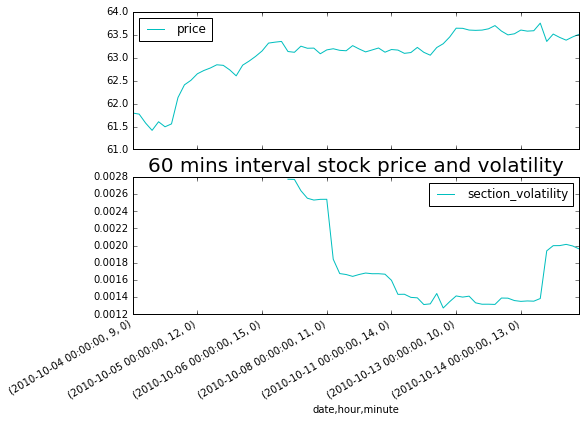

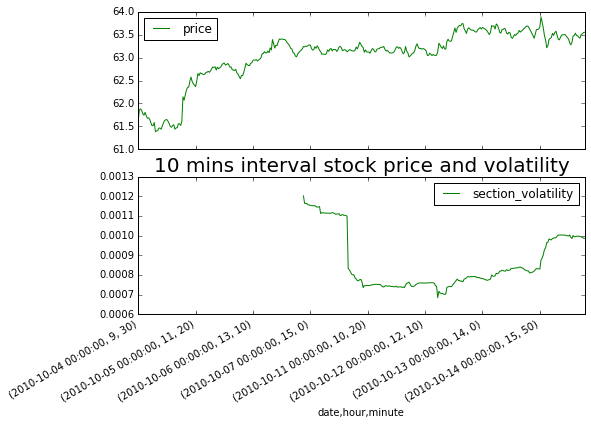

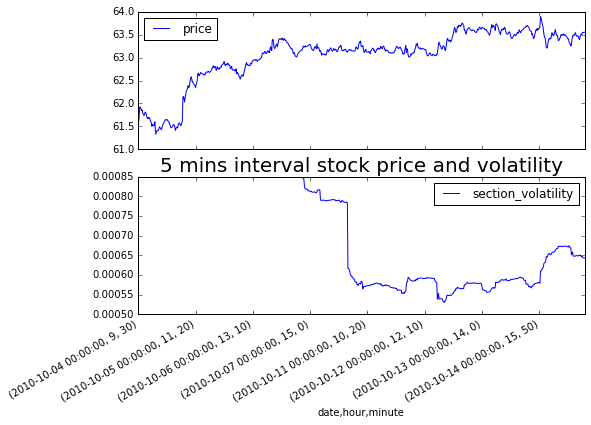

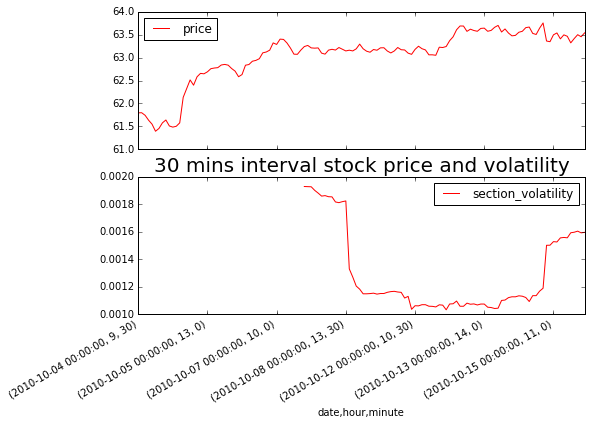

In [13]:
color_dict = {'5': 'b', '10': 'g', '30': 'r', '60': 'c'}


for key in data_dict:
    data_dict[key].loc[:, ['price', 'section_volatility']].plot(subplots=True, color=color_dict[key],figsize=(8, 6))
    plt.title(key+' mins interval stock price and volatility', fontsize=20)

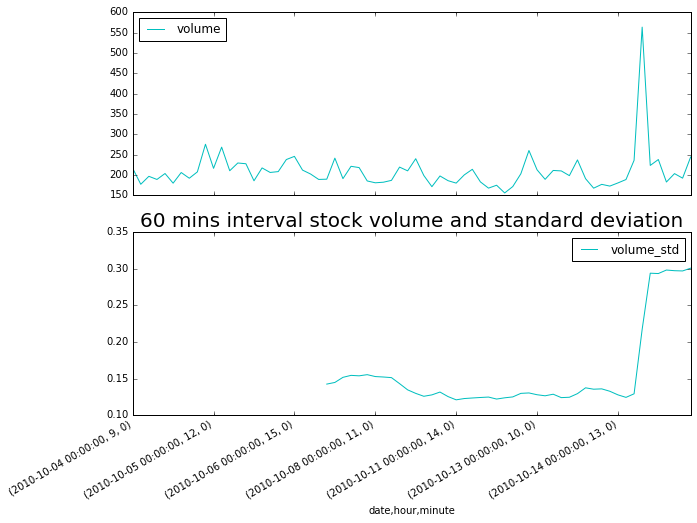

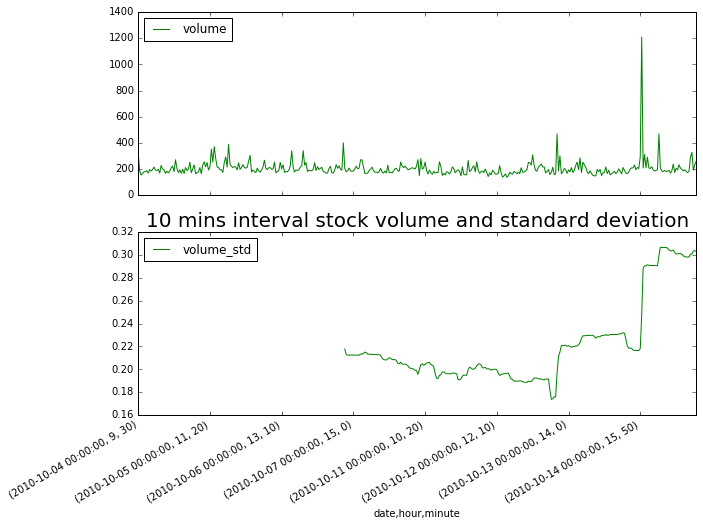

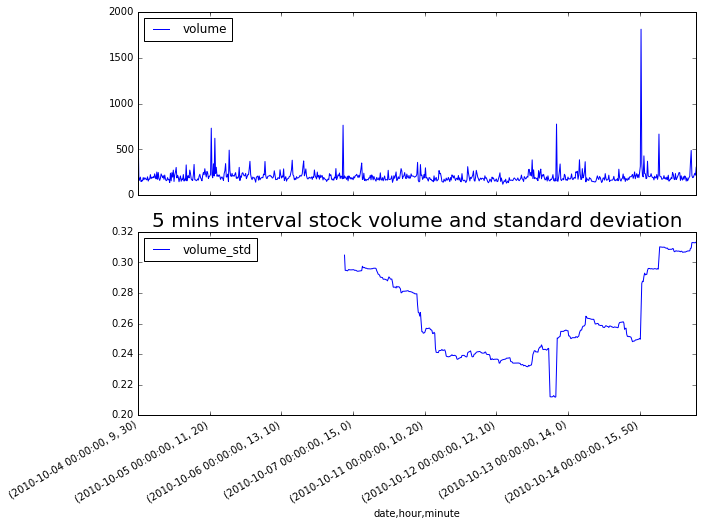

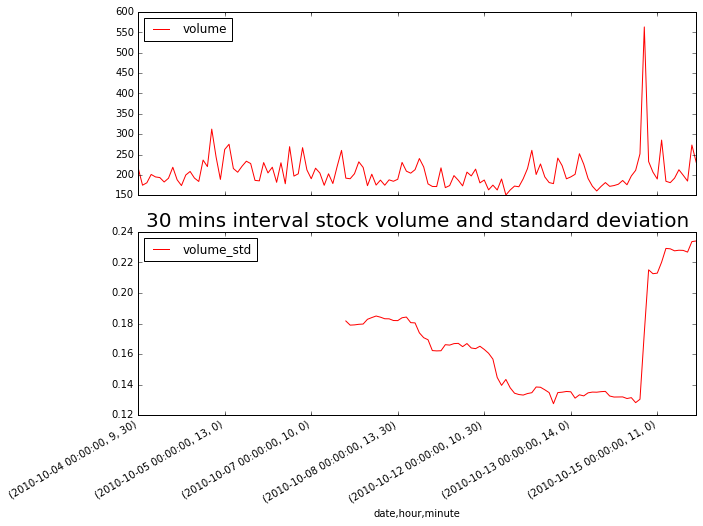

In [14]:
for key in data_dict:
    data_dict[key].loc[:, ['volume', 'volume_std']].plot(subplots=True, color=color_dict[key],figsize=(10, 8))
    plt.title(key+' mins interval stock volume and standard deviation', fontsize=20)

In [15]:
print('This is the comparison for skewness and kurtosis of log return (u_sequence)\n')
print('{: <25s}\t{: <25s}\t{: <25s}'.format('time interval', 'skewness', 'kurtosis' ))
for key in data_dict:
    print('{: <25s}\t{: <25f}\t{: <25f}'.format(key, data_dict[key].loc[:, 'u_skewness'].mean(), data_dict[key].loc[:, 'u_kurtosis'].mean()))

This is the comparison for skewness and kurtosis of log return (u_sequence)

time interval            	skewness                 	kurtosis                 
60                       	0.632995                 	4.587038                 
10                       	1.923667                 	14.373215                
5                        	2.244461                 	25.778025                
30                       	0.818402                 	7.704075                 


In [16]:
print('This is the comparison for skewness and kurtosis of volume section standard deviation\n')
print('{: <25s}\t{: <25s}\t{: <25s}'.format('time interval', 'skewness', 'kurtosis' ))
for key in data_dict:
    print('{: <25s}\t{: <25f}\t{: <25f}'.format(key+'mins', data_dict[key].loc[:, 'v_skewness'].mean(), data_dict[key].loc[:, 'v_kurtosis'].mean()))

This is the comparison for skewness and kurtosis of volume section standard deviation

time interval            	skewness                 	kurtosis                 
60mins                   	-0.250810                	8.851394                 
10mins                   	-0.386232                	10.765500                
5mins                    	-0.091707                	8.770277                 
30mins                   	-0.080972                	4.954794                 


Comparing the skewness and kurtosis of log return, for smaller time interval, the distribution is more skewed to right (positive) and kurtosis is higher, which means that it more concentrated around its peak value.

Comparing the skewness and kurtosis of volume section standard deviation, 5mins and 30mins have the lowest absolute skewness value, which menas that they are less skewed to the left, while 10mins and 60 mins are more skewed. In terms of kurtosis, 5mins and 60mins are more similar than other two. 30mins is the flattest one and the closest one to normal distribution. 10mins is most topped with less extreme values and outliers.

In [17]:
df = pd.read_csv('~/PycharmProjects/Financial_Programming/Homework/HW2/TAQ_CAT_QUOTE_0104_2010.csv', delim_whitespace=True)
df.columns = ['date', 'hour', 'minute', 'second', 'bid', 'ask', 'bidsize', 'ofrsize']
df.dtypes

date         int64
hour         int64
minute       int64
second       int64
bid        float64
ask        float64
bidsize      int64
ofrsize      int64
dtype: object

In [18]:
df_10_16 = df.loc[(df.hour >= 10) & (df.hour < 16)]
df_9 = df.loc[(df.hour == 9) & (df.minute >= 30)]

data = pd.concat([df_10_16, df_9], axis=0)

data.reset_index(drop=True, inplace=True)

data.to_csv('TAQ_CAT_QUOTE_0104_2010_trading_normal_hours.csv')

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

data.loc[:,'date'] = pd.to_datetime(data.loc[:, 'date'].astype(str))

data.dtypes

date       datetime64[ns]
hour                int64
minute              int64
second              int64
bid               float64
ask               float64
bidsize             int64
ofrsize             int64
dtype: object

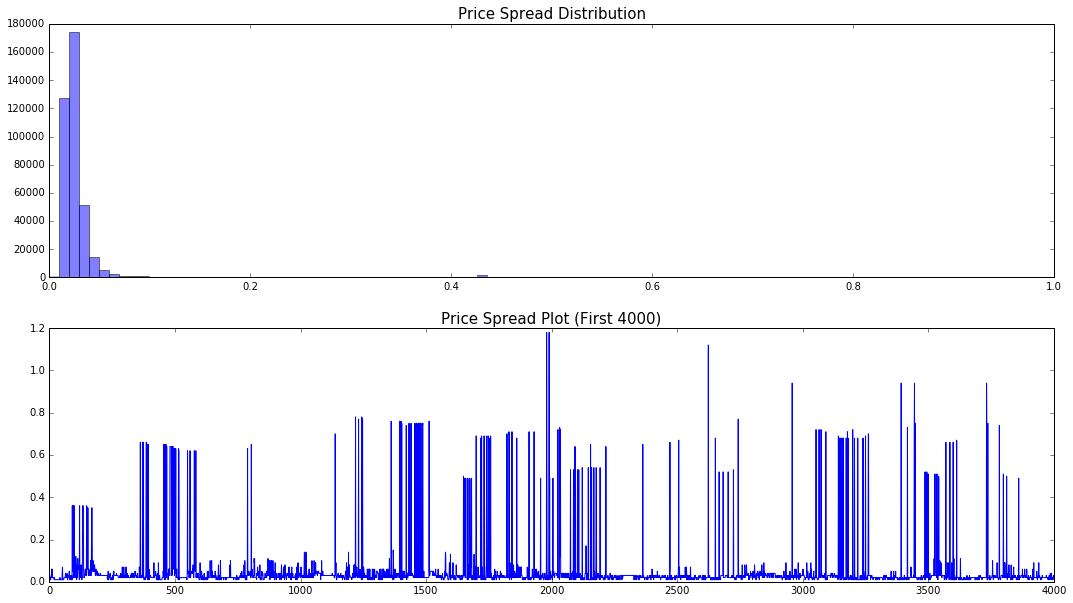

In [20]:
fig = plt.figure(figsize=(18,10))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)


data.loc[:, 'delta'] = data.loc[:, 'ask'] - data.loc[:, 'bid']

# outliers removed
ax1.hist(data.loc[abs(data.loc[:, 'delta'])<1, 'delta'], color='b', alpha=0.5, bins=100)
ax2.plot(data.loc[:4000, 'delta'], 'b-')


ax1.set_title('Price Spread Distribution', fontsize=15)
ax2.set_title('Price Spread Plot (First 4000)', fontsize=15)

The bid and ask price spread is very small and most of them are between 0.0 and 0.1

In [21]:
data.head()

,date,hour,minute,second,bid,ask,bidsize,ofrsize,delta
0,2010-01-04,10,0,0,58.25,58.26,1,1,0.01
1,2010-01-04,10,0,0,58.24,58.26,2,1,0.02
2,2010-01-04,10,0,0,58.25,58.26,1,1,0.01
3,2010-01-04,10,0,0,58.24,58.26,2,1,0.02
4,2010-01-04,10,0,0,58.25,58.26,2,3,0.01


In [22]:
def partition(df, interval = 5, unit = 'minute'):
    import pandas as pd
    import numpy as np
    '''
    This function will partition the trading time sequence into 5/10/30/60-minute intervals by picking the mean transaction bid and ask price 
    and volumes in each interval. Then it will calculate entropy values for offer and bid volume as follows:
        (a) Hoffer 
        (b) pi 
        (c) Hbid
        (d) qi
        (e) H(P||Q)
        
    parameters:
    
    df - original high frequency trading data
    interval - 5 mins, 10mins, 30mins or 60mins
    unit - second, minute (default), hour
    
    :return: new trading data after partitioning and save it to a new csv file
    '''
    
    df_new = pd.DataFrame()
    
    column = ['date', 'hour', 'minute', 'second', 'bid', 'ask', 'bidsize', 'ofrsize']

    
    if unit == 'second':
        r = 60
        window = 24 * 60 * 60 // interval
    elif unit == 'minute':
        column.remove('second')
        r = 60
        window = 24 * 60 // interval
    else:
        column.remove('second')
        column.remove('minute')
        r = 24
        window = 24 // interval
        
    df_new = df.loc[:, column]
    
    last_intvl = 0
    for intvl in range(0, r+1, interval):
        df_new.loc[(df_new.loc[:, unit] > last_intvl) & (df_new.loc[:, unit] < intvl), unit] = last_intvl
        last_intvl = intvl
    
    groupby = column[:-4]
    df_new = df_new.groupby(groupby).mean()
    
    df_new.loc[:, 'bid_u_sequence'] = np.log(df_new.bid / df_new.bid.shift(1))
    df_new.loc[:, 'ask_u_sequence'] = np.log(df_new.ask / df_new.ask.shift(1))
    
    df_new.loc[:, 'bid_v_sequence'] = np.log(df_new.bidsize / df_new.bidsize.shift(1))
    df_new.loc[:, 'ask_v_sequence'] = np.log(df_new.ofrsize / df_new.ofrsize.shift(1))
    
    df_new.loc[:, 'bid_section_volatility'] = df_new.loc[:, 'bid_u_sequence'].rolling(window=r).std()
    df_new.loc[:, 'ask_section_volatility'] = df_new.loc[:, 'ask_u_sequence'].rolling(window=r).std()
    
    df_new.loc[:, 'bid_volume_std'] = df_new.loc[:, 'bid_v_sequence'].rolling(window=r).std()
    df_new.loc[:, 'ask_volume_std'] = df_new.loc[:, 'ask_v_sequence'].rolling(window=r).std()
    
    #df_new.loc[:, 'u_skewness'] = df_new.loc[:, 'u_sequence'].skew()
    #df_new.loc[:, 'u_kurtosis'] = df_new.loc[:, 'u_sequence'].kurtosis()
    #df_new.loc[:, 'v_skewness'] = df_new.loc[:, 'v_sequence'].skew()
    #df_new.loc[:, 'v_kurtosis'] = df_new.loc[:, 'v_sequence'].kurtosis()
    
    
    df_new.to_csv('TAQ_CAT_QUOTE_0104_2010_' + str(interval) + '_min_trading_unit.csv')
    
    return df_new

all files are saved


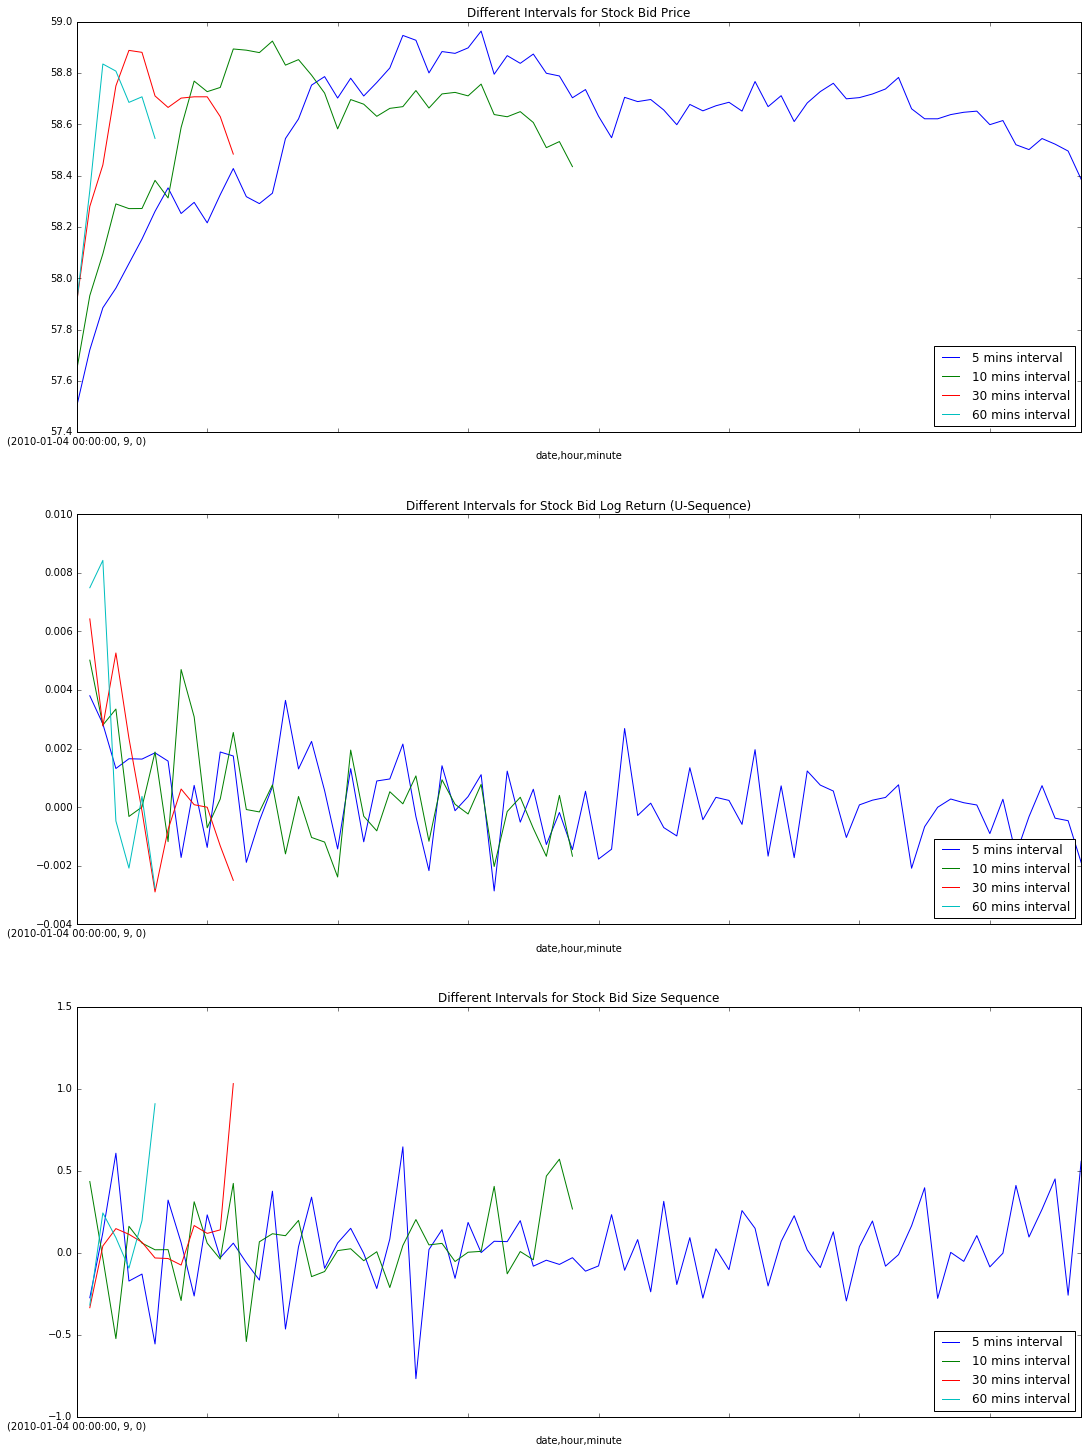

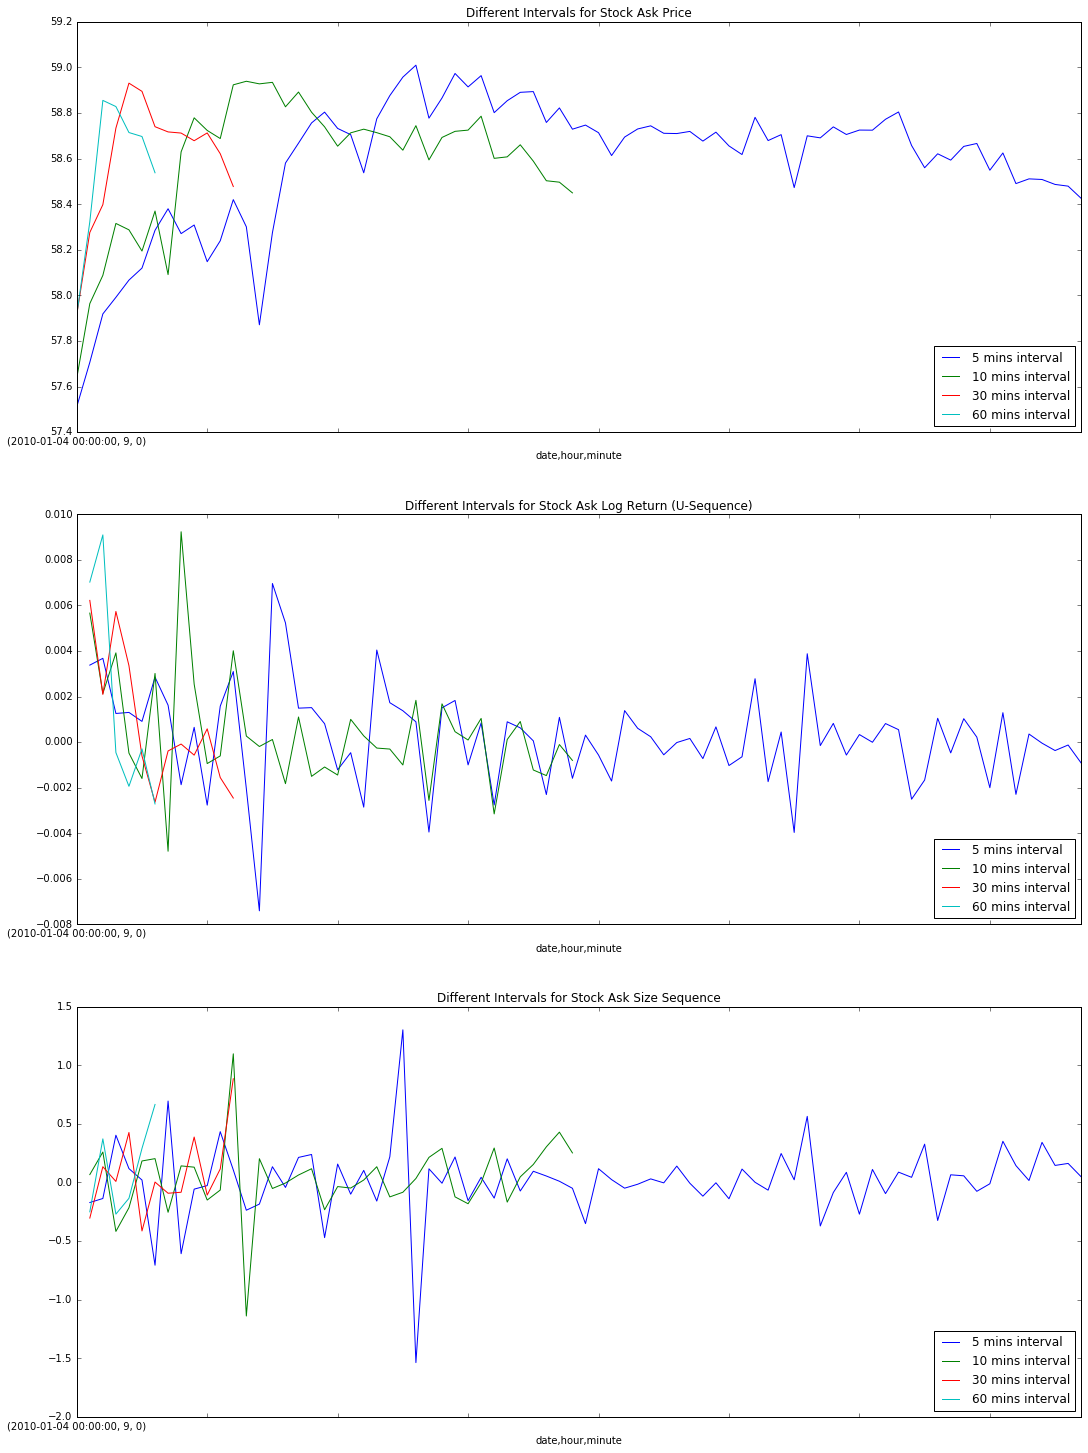

In [23]:
data_dict = {}

plt.figure(1, figsize=(18,25))    
plt.figure(2, figsize=(18,25))



for intvl in [5, 10, 30, 60]:
    
    data_dict[str(intvl)] = partition(data, interval=intvl)
    
    plt.figure(1)
    plt.subplot(311)
    
    data_dict[str(intvl)].loc[:, 'bid'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Bid Price')
    
        
    plt.subplot(312)
    
    data_dict[str(intvl)].loc[:, 'bid_u_sequence'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Bid Log Return (U-Sequence)')
    
    
    plt.subplot(313)
    data_dict[str(intvl)].loc[:, 'bid_v_sequence'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Bid Size Sequence')
    
    
    
    plt.figure(2)
    plt.subplot(311)
    
    data_dict[str(intvl)].loc[:, 'ask'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Ask Price')
    
        
    plt.subplot(312)
    
    data_dict[str(intvl)].loc[:, 'ask_u_sequence'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Ask Log Return (U-Sequence)')
    
    
    plt.subplot(313)
    data_dict[str(intvl)].loc[:, 'ask_v_sequence'].plot(label=str(intvl) + ' mins interval')
    plt.legend(loc=4)
    plt.title('Different Intervals for Stock Ask Size Sequence')
    
    
print('all files are saved')

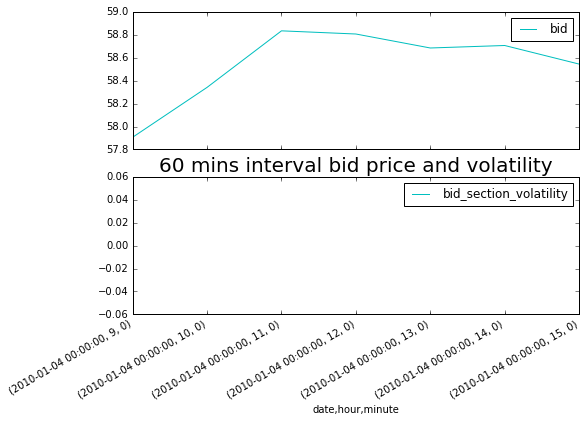

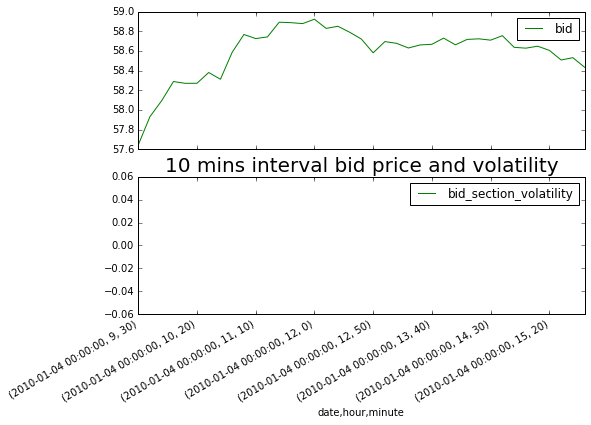

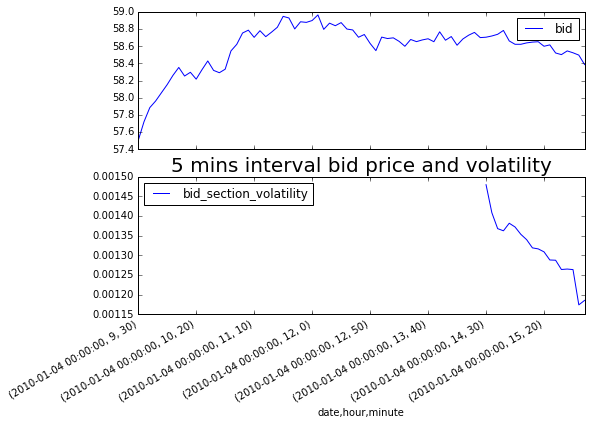

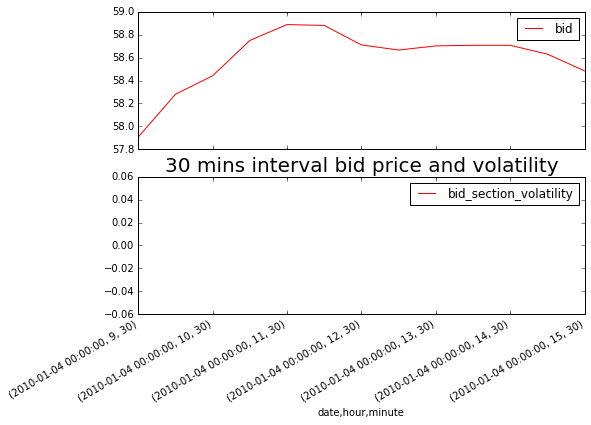

In [24]:
color_dict = {'5': 'b', '10': 'g', '30': 'r', '60': 'c'}


for key in data_dict:
    data_dict[key].loc[:, ['bid', 'bid_section_volatility',]].plot(subplots=True, color=color_dict[key],figsize=(8, 6))
    
    plt.title(key+' mins interval bid price and volatility', fontsize=20)

Only 5 mins has the section volatility has value due to lack of enough data points; also since the difference between bid and ask price is so small, ask price chart is almost the same.

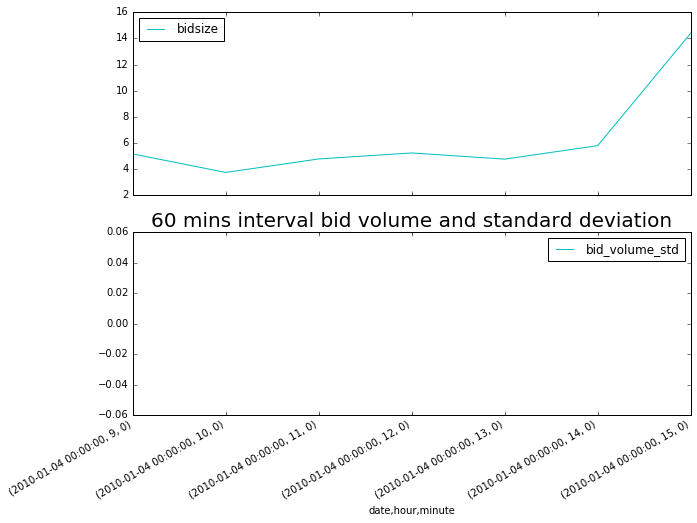

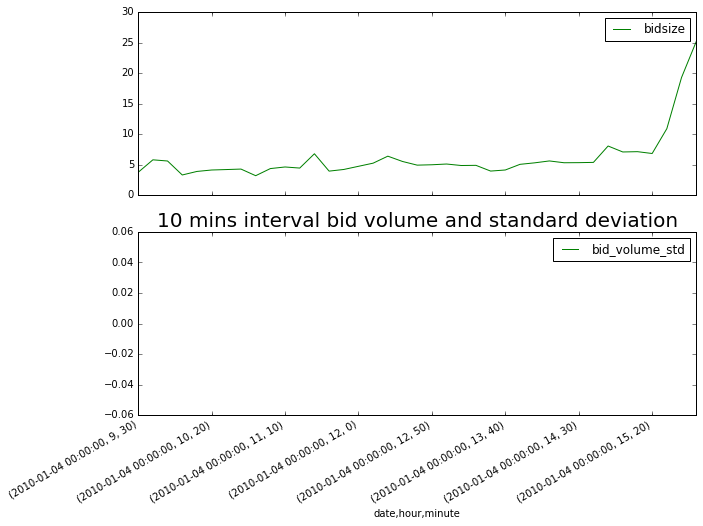

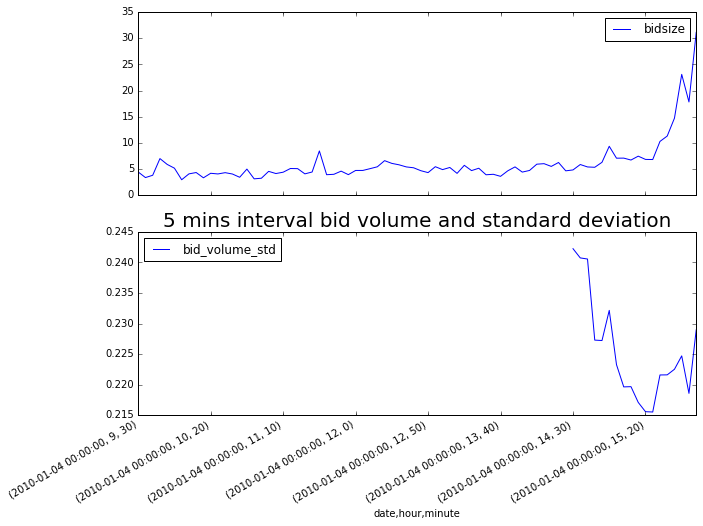

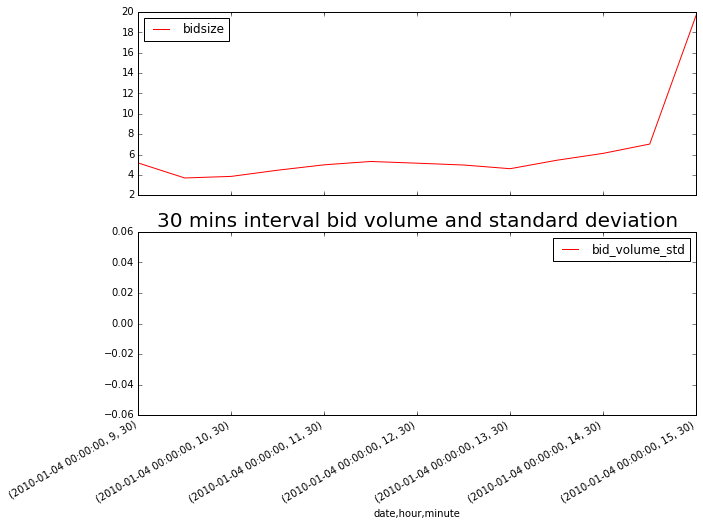

In [25]:
for key in data_dict:
    data_dict[key].loc[:, ['bidsize', 'bid_volume_std']].plot(subplots=True, color=color_dict[key],figsize=(10, 8))
    plt.title(key+' mins interval bid volume and standard deviation', fontsize=20)

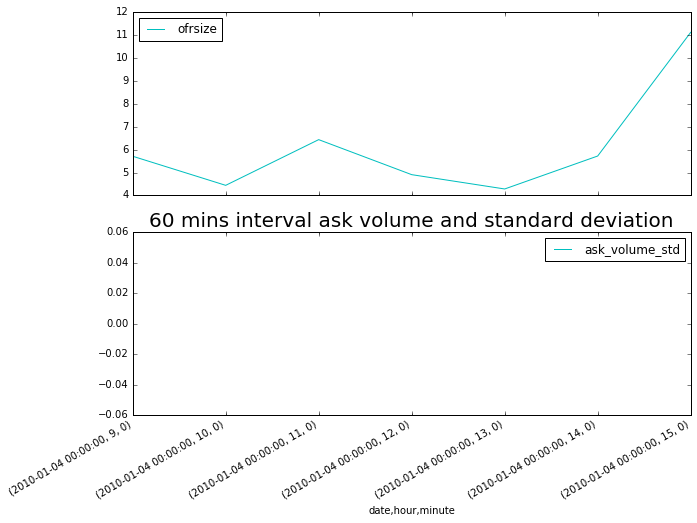

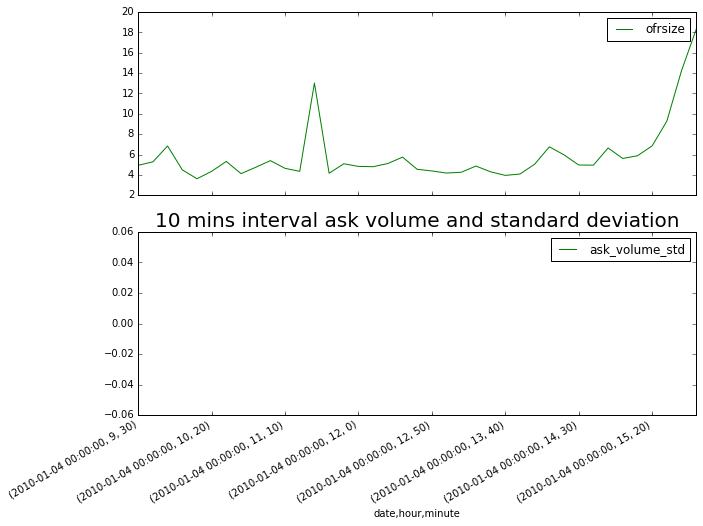

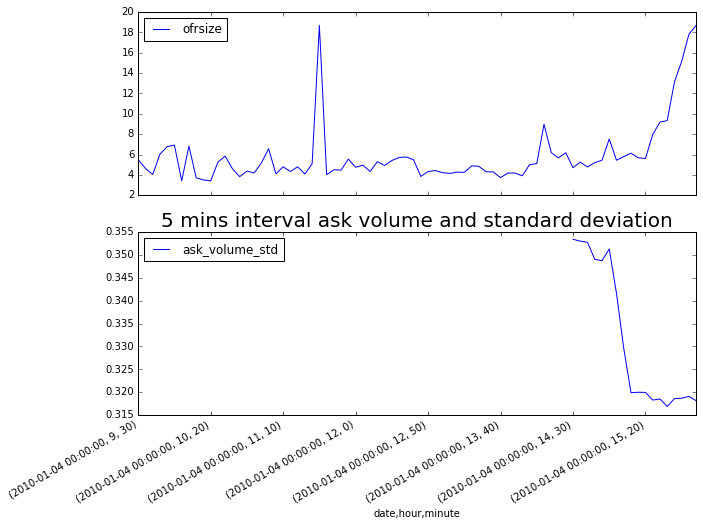

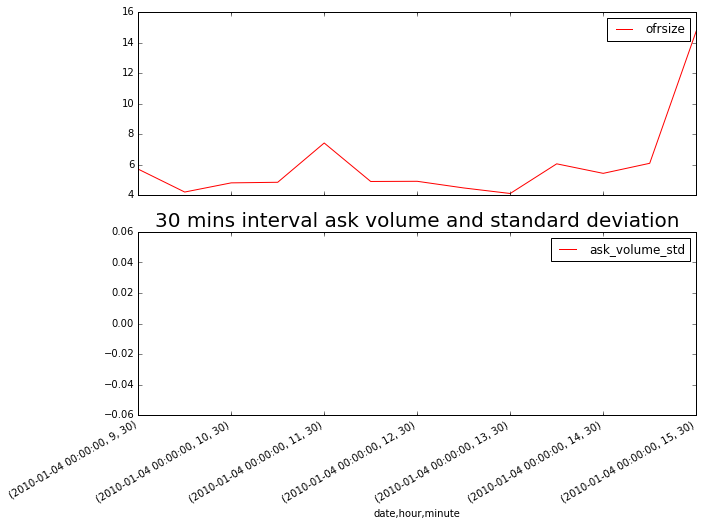

In [26]:
for key in data_dict:
    data_dict[key].loc[:, ['ofrsize', 'ask_volume_std']].plot(subplots=True, color=color_dict[key],figsize=(10, 8))
    plt.title(key+' mins interval ask volume and standard deviation', fontsize=20)

In [27]:
print('This is the comparison for skewness and kurtosis of log return (u_sequence)\n')
print('{: <25s}\t{: <25s}\t{: <25s}\t{: <25s}\t{: <25s}'.format('time interval', 'bid_skewness', 'ask_skewness', 'bid_kurtosis', 'ask_kurtosis' ))
for key in data_dict:
    
    bid_skew = data_dict[key].loc[:, 'bid_u_sequence'].skew()
    ask_skew = data_dict[key].loc[:, 'ask_u_sequence'].skew()
    bid_kurtosis = data_dict[key].loc[:, 'bid_u_sequence'].kurtosis()
    ask_kurtosis = data_dict[key].loc[:, 'ask_u_sequence'].kurtosis()
    

    print('{: <25s}\t{: <25f}\t{: <25f}\t{: <25f}\t{: <25f}'.format(key+'mins', bid_skew, ask_skew, bid_kurtosis, ask_kurtosis))

This is the comparison for skewness and kurtosis of log return (u_sequence)

time interval            	bid_skewness             	ask_skewness             	bid_kurtosis             	ask_kurtosis             
60mins                   	0.762854                 	0.898070                 	-1.788144                	-1.435057                
10mins                   	0.982952                 	1.304945                 	0.750209                 	3.527579                 
5mins                    	0.203653                 	-0.110808                	-0.162347                	2.314036                 
30mins                   	0.774958                 	0.847565                 	-0.074077                	-0.333396                


In [28]:
import numpy as np

print('This is the comparison for entropy values for offer and bid volume:\n')
print('{: <25s}\t{: <25s}\t{: <25s}\t{: <25s}'.format('time interval', 'H_offer', 'H_bid', 'H_P||Q' ))

for key in data_dict:
    p = data_dict[key].loc[:, 'ofrsize'] / data_dict[key].loc[:, 'ofrsize'].sum()
    q = data_dict[key].loc[:, 'bidsize'] / data_dict[key].loc[:, 'bidsize'].sum()
    
    H_offer = (-p * np.log2(p)).replace([np.inf, -np.inf] , 0).sum()
    H_bid = (-q * np.log2(q)).replace([np.inf, -np.inf] , 0).sum()
    H_PQ = (p * np.log2(p/q)).replace([np.inf, -np.inf] , 0).sum()
    
    print('{: <25s}\t{: <25f}\t{: <25f}\t{: <25f}'.format(key+'mins', H_offer, H_bid, H_PQ))

This is the comparison for entropy values for offer and bid volume

time interval            	H_offer                  	H_bid                    	H_P||Q                   
60mins                   	2.727246                 	2.642685                 	0.025830                 
10mins                   	5.151143                 	5.075679                 	0.039160                 
5mins                    	6.136097                 	6.068751                 	0.050512                 
30mins                   	3.589083                 	3.494744                 	0.028772                 
